# Beautiful Soup Tutorial 

<img src="../assets/beautifulsoup.jpg" alt="beautifulSoup" width="800"/>

### What is Beautiful Soup? 

<img src="../assets/datascrapememe.jpeg" alt="beautifulSoup" width="800"/>

A library for parsing information from a web page's HTML or XML code. This can include text data, links, images, and specific elements (titles, sections) from webpages. 

Beautiful Soup was created by Leonard Richardson, initially released in 2004. The last updated version (4) was released in April of 2023. It is only supported in Python.


### Why Beautiful Soup? 

<img src="../assets/bsmeme.jpeg" alt="beautifulSoup" width="400"/>


Beautiful Soup provides a way to easily scrape data from a website that is not readily available as a .csv. It transforms the website data into specific python objects, which can be helpful for navigating, searching, and modifying data from the web.

There are other libraries that have similar functions such as Selenium or Scrapy. BeautifulSoup is known for it's speed and is better for smaller scale simple web-scraping tasks. Selenium includes more options, for example, navigating between multiple pages and button clicks. Scrapy is best suited for large more complex scraping because it is a framework and does not require knowledge of Python to use.

TLDR: The advantage of Beautiful Soup is that it's simple, fast, and relatively easy to learn in comparison to other scrapers. 

To Note: Web scraping can be risky depending on privacy policies of pages. Make sure to read the details of each website's policies prior to scrubbing the data. You can check the 'robots.txt' file on a website to determine if the data is publically accessible. 



### Installation Instructions:
1. Run this in your terminal: 
```python
    pip install beautifulsoup4
```

2. Add the libraries at the top of your code:
```python
    from bs4 import BeautifulSoup
    import requests

``````

    Note on Dependencies:   

    -Use the "beautiful_group_3" environment
    -Import "requests-html" if you want to request dynamically generated content, handle authentication




## Key Functions within Beautiful Soup
#### get the title of a page
print(soup.title)

#### get attributes of the page:
print(soup.title.name)

#### get text values on the page:
print(soup.title.string)

#### beginning navigation:
print(soup.title.parent.name)

#### getting specific values:
print(soup.p)

#### get anchor tags on the page:

#### get tables from the page:


### Tutorial 
-insert Oksana's tutorial video here-
-insert code chunks for parsing data into a dataframe-



Example:

In [2]:
#Import Libraries Needed
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import requests


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Define the URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_California_wildfires'
# Send an HTTP GET request to the URL
response = requests.get(url)
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')
    # Find the wildfire data table based on the HTML structure (you need to inspect the page)
    table = soup.find('table', {'class': 'wikitable'})  # Assuming the table has 'wikitable' class
# Check if the table was found
    if table:
        # Initialize lists to store data
        headers = []
        rows = []
        # Extract table headers
        header_row = table.find('tr')
        header_columns = header_row.find_all('th')
        headers = [column.get_text().strip() for column in header_columns]
        # Extract table data
        data_rows = table.find_all('tr')[1:]  # Skip the header row
        for row in data_rows:
            columns = row.find_all('td')
            row_data = [column.get_text().strip() for column in columns]
            rows.append(row_data)
        # Create a DataFrame from the extracted data
        df = pd.DataFrame(rows, columns=headers)
        # Display the DataFrame
        print(df)
    else:
        print('Wildfire data table not found on the page.')
else:
    print(f'Failed to retrieve the Wikipedia page. Status Code: {response.status_code}')
  

              Year  Fires      Acres   Hectares           Ref
0             2000  7,622    295,026    119,393          [12]
1             2001  9,458    329,126    133,193          [13]
2             2002  8,328    969,890    392,500      [14][15]
3             2003  9,116  1,020,460    412,970  [16][17][18]
4             2004  8,415    264,988    107,237      [19][20]
5             2005  7,162    222,538     90,058      [21][22]
6             2006  8,202    736,022    297,858      [23][24]
7             2007  9,093  1,520,362    615,269      [12][25]
8             2008  6,255  1,593,690    644,940          [12]
9             2009  9,159    422,147    170,837      [26][27]
10            2010  6,554    109,529     44,325          [28]
11            2011  7,989    168,545     68,208      [29][30]
12            2012  7,950    869,599    351,914          [31]
13            2013  9,907    601,635    243,473      [32][33]
14            2014  7,865    625,540    253,150      [34][35]
15      

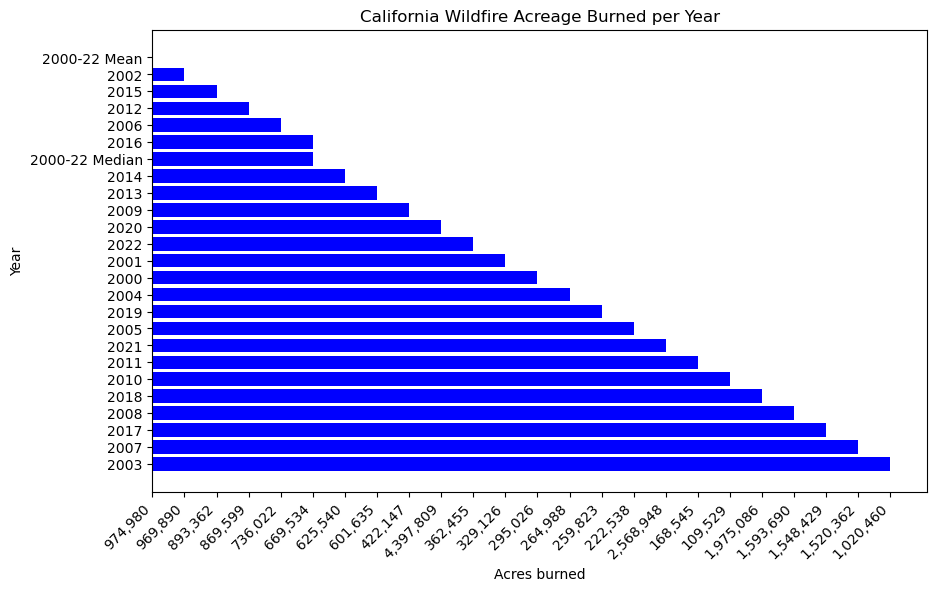

In [4]:
  
# Sort the DataFrame by acres burned in descending order
df = df.sort_values(by='Acres', ascending=False)
# Create a bar plot of the top wildfires by acres burned
plt.figure(figsize=(10, 6))
plt.barh(df['Year'], df['Acres'], color='blue')
plt.xlabel('Acres burned')
plt.ylabel('Year')
plt.title('California Wildfire Acreage Burned per Year')
plt.gca().invert_yaxis()  # Reverse the order to show the largest first
plt.xticks(rotation=45, ha='right')
plt.show()

### Potential Use in Environmental Data Science:

- **Environmental Monitoring**: Web scraping enables the retrieval of real-time or near-real-time data regularly updated from multiple sources (e.g., air quality, weather monitoring). This provides a timely and accurate view of specific environmental issues.

- **Environmental Data Collection**: It allows for the collection of data from sources that do not always offer direct access to the source data (e.g., PDFs, Internet archives, government reports, NGOs reports, DataONE xml files, data in shiny apps). 

- **Extraction and Organization of Data from Remote Sensing Sources**: This includes data from satellite imagery and aerial drones.

- **Ability to Scrape Data from Various Sources with Varying Formats**: This capability enables the monitoring and analysis of emerging environmental patterns (e.g., wildlife populations, habitat quality, urban ecosystems).



### Limitations & Permissioning:

* Beautifulsoup4 is great for working with smaller data sets from static webpages (blogs, Wikipedia pages, any "read only" pages), but not great if you're looking to a whole website or very large data sets

* Only parses data, so you'll need another tool (like requests) to extract the data

* Only works with python

* Only works for HTML or XML files (will NOT work for JavaScript rendered web pages)

### Other Options for More Complex Web Scraping:

* Scrapy -> good for large-scale data

* Selenium -> can handle dynamic web pages



### Resources: 
Project is located here:

https://github.com/fletcher-m/group3_project 

About Beautiful Soup:

https://realpython.com/beautiful-soup-web-scraper-python/

Additional Resources:

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

https://www.topcoder.com/thrive/articles/web-scraping-with-beautiful-soup
